# Introduction to Time Series

In [72]:
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [2]:
# Now let’s read the data
candies = pd.read_csv(r'datasets_3004_5028_candy_production.csv')

In [12]:
# copy of data
candies_original=candies.copy()
candies.head()

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


# Dataset Structure and Content

In [13]:
#  data columns
print('columsn of data {}:'.format(candies.columns))

# data type
print('data type{}'.format(candies.dtypes))

# shape of data
print('shape of data {}'.format(candies.shape))

columsn of data Index(['observation_date', 'IPG3113N'], dtype='object'):
data typeobservation_date    datetime64[ns]
IPG3113N                   float64
dtype: object
shape of data (548, 2)


# Feature Extraction

# Q1 Extract the year, month and day from the observation_date

In [15]:
#  Write your code here

In [16]:
# output from above code
candies.head()

,observation_date,IPG3113N,year,month,day
0,1972-01-01,85.6945,1972,1,1
1,1972-02-01,71.8200,1972,2,1
2,1972-03-01,66.0229,1972,3,1
3,1972-04-01,64.5645,1972,4,1
4,1972-05-01,65.0100,1972,5,1


# EDA - Plots (trend? seasonality?)

# Q2 Plot various plot and write intution 

### a) Plot timeseries

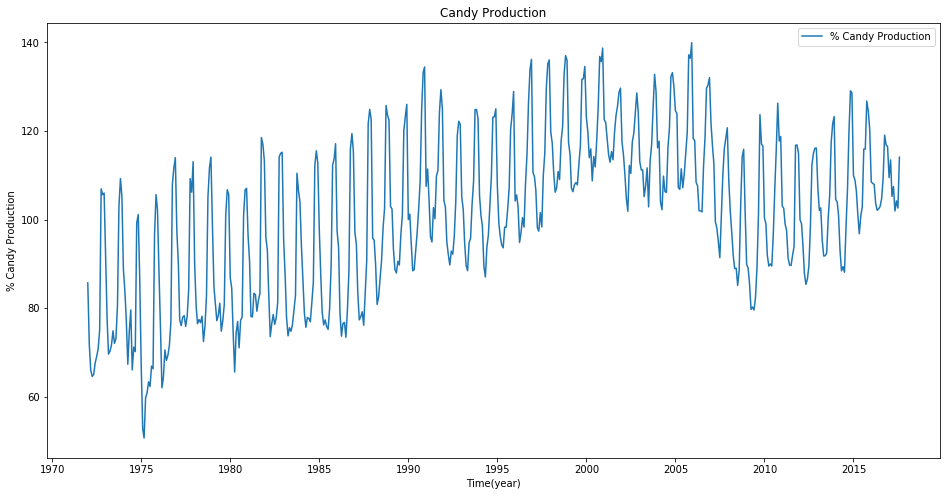

In [17]:
# indexing the Datetime to get the time period on the x-axis.
# write your code 
plt.figure(figsize=(16,8))

### b) Plot yearly production count and monthly production count

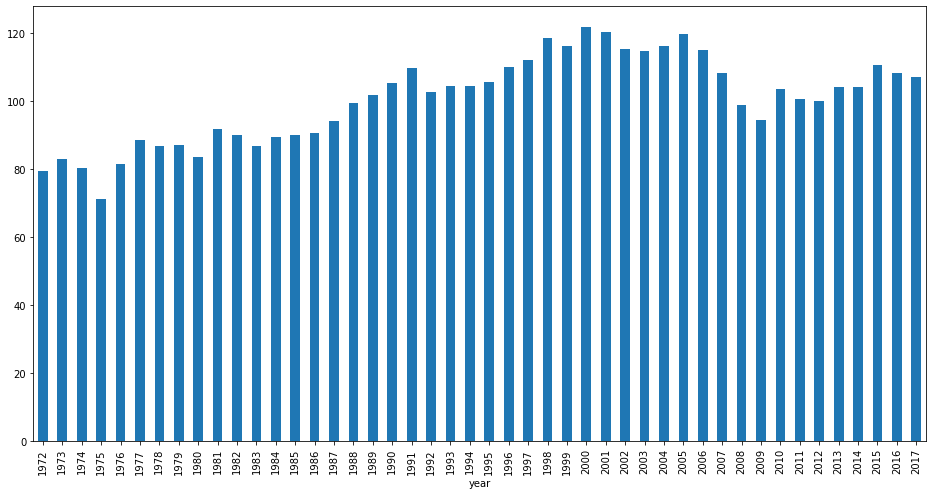

In [18]:
plt.figure(figsize=(16,8))
# write the code here 

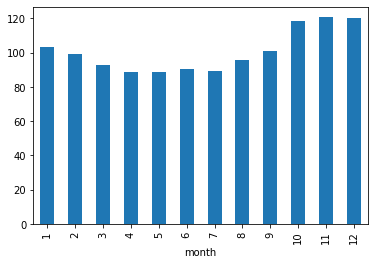

In [19]:
# for montly write code here

# Splitting the data into training and validation part

In [45]:
train = candies.iloc[:504]
valid = candies.iloc[504:]

### c) Plot the traina and valid data 

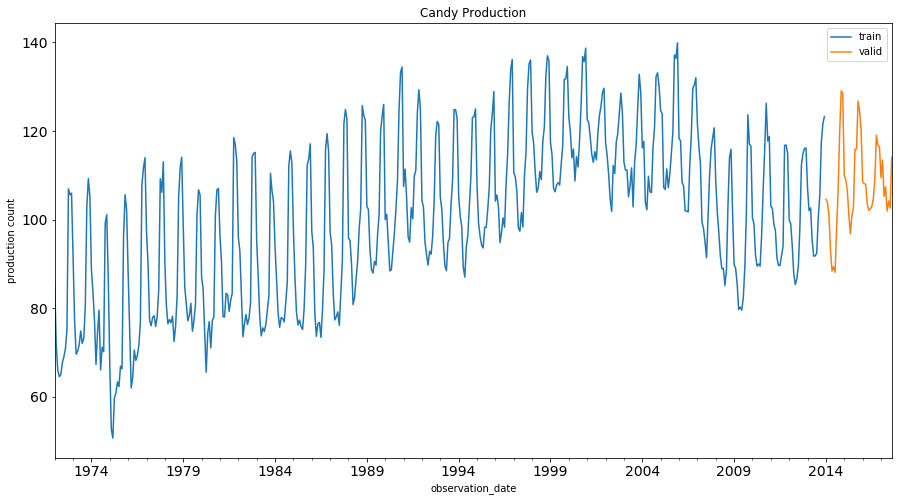

In [48]:
# Write your code here

plt.show()

# Q3 Exponential models: Ses, Holt, Holt Winters

## a) Vary the various parameters for the Ses, Holt, Holt Winters and write the observation 

### Ses

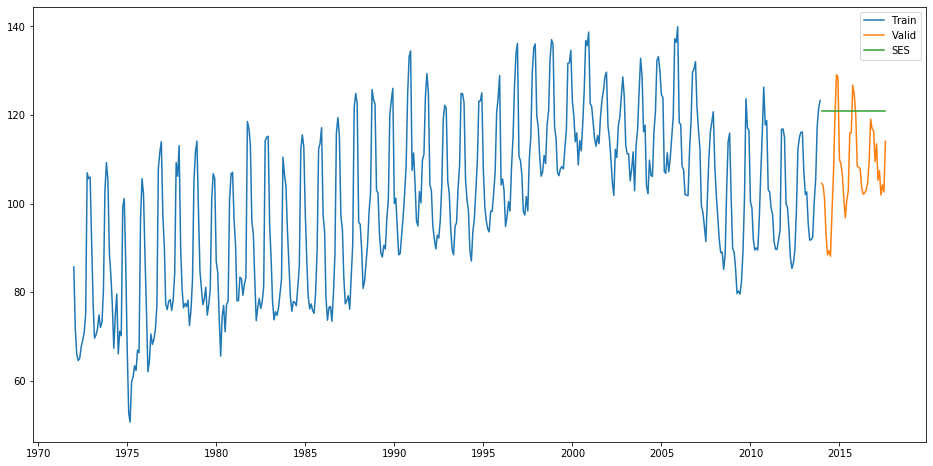

In [49]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_ex = valid.copy()

# 1. wirte the code for simple expoential smoothing 
# 2. Change the parameter like(smoothing_level), and wirte the observation in one line

fit2 = SimpleExpSmoothing( # set the parameter other than default)

y_hat_ex['SES'] = fit2.forecast(len(valid))

#  3. plot the forcasted value against actuals
#  wirte your code here
    
    
plt.figure(figsize=(16,8))
plt.plot(y_hat_ex['SES'], label='SES')
plt.legend(loc='best')
plt.show()
# wirte the observation here

### Holt’s Linear Trend Model

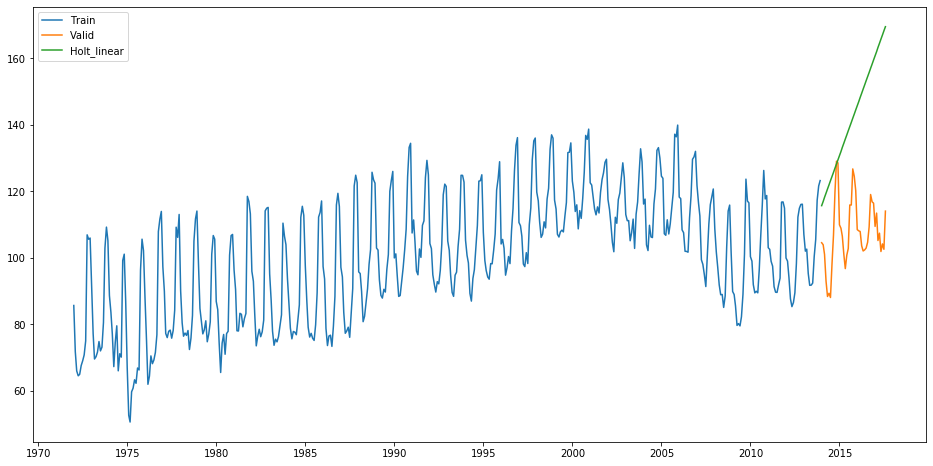

In [55]:
y_hat_ex = valid.copy()

# 1. wirte the code for simple expoential smoothing 
# 2. Change the parameter like(smoothing_level, smoothing_slope), and wirte the observation in one line

fit1 = Holt(np.asarray(# set the paramters other than default))
y_hat_ex['Holt_linear'] = fit1.forecast(len(valid))

#  3. plot the forcasted value against actuals
#  wirte your code here
plt.figure(figsize=(16,8))
plt.plot(y_hat_ex['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

### Holt’s Winter method

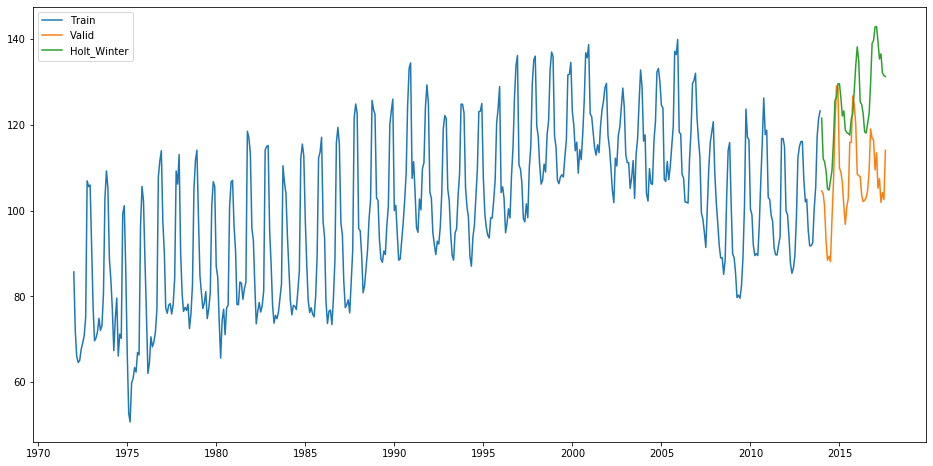

In [56]:
y_hat_win = valid.copy()

# 1. wirte the code for simple expoential smoothing 
# 2. Change the parameter like(smoothing_level, smoothing_slope), and wirte the observation in one line

fit1 = ExponentialSmoothing().fit()
y_hat_win['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))

#  3. plot the forcasted value against actuals
#  wirte your code here

plt.plot(y_hat_win['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

### b) Compare the RMSE of each method

In [57]:
# write your code here

# ARIMA

# Q4 Wirte the observation for stationarity of data

In [58]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

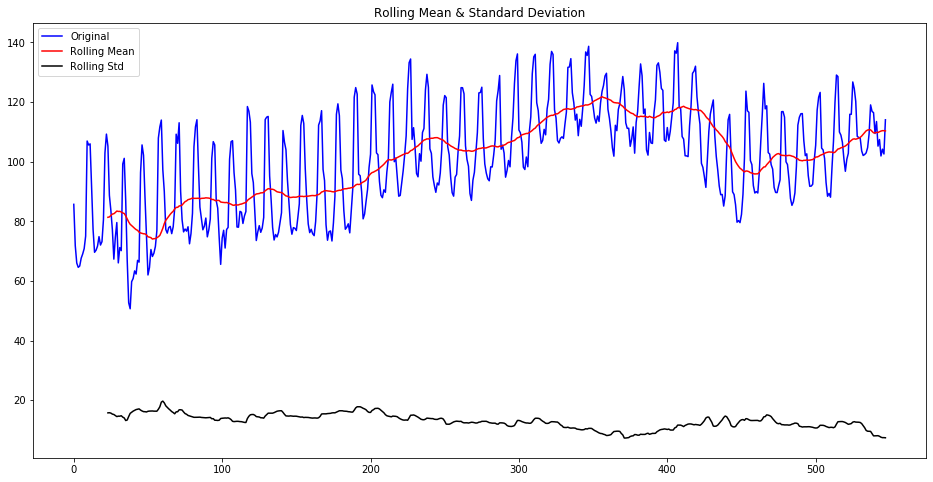

Results of Dickey-Fuller Test:
Test Statistic                  -1.887050
p-value                          0.338178
#Lags Used                      14.000000
Number of Observations Used    533.000000
Critical Value (1%)             -3.442678
Critical Value (5%)             -2.866978
Critical Value (10%)            -2.569666
dtype: float64


In [59]:
plt.figure(figsize=(16,8))
test_stationarity(candies_original['IPG3113N'])

### write the observation about stationarity of data

In [ ]:
# Observation

### b) Do the same by taking log tranformation and comapre the result from above

In [60]:
# Write the observation here

## write the observation about stationarity of data

In [1]:
# Write the observation here

# Removing Seasonality

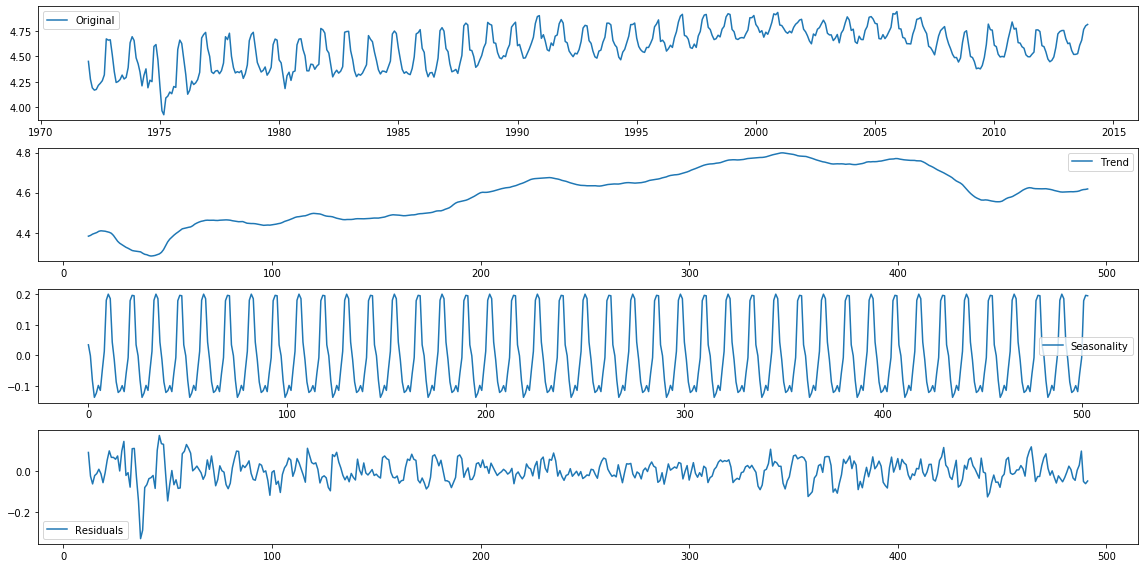

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(train_log).IPG3113N.values, freq = 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,8))
plt.subplot(411)
plt.plot(train_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Forecasting the time series using ARIMA

First of all we will fit the ARIMA model on our time series for that we have to find the optimized values for the p,d,q parameters.

To find the optimized values of these parameters, we will use ACF(Autocorrelation Function) and PACF(Partial Autocorrelation Function) graph.

ACF is a measure of the correlation between the TimeSeries with a lagged version of itself.

PACF measures the correlation between the TimeSeries with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons.

# Plot ACF and PACF plot and determine the optimanl value 

### Write how to interpret the ACF and PACF plot

In [66]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

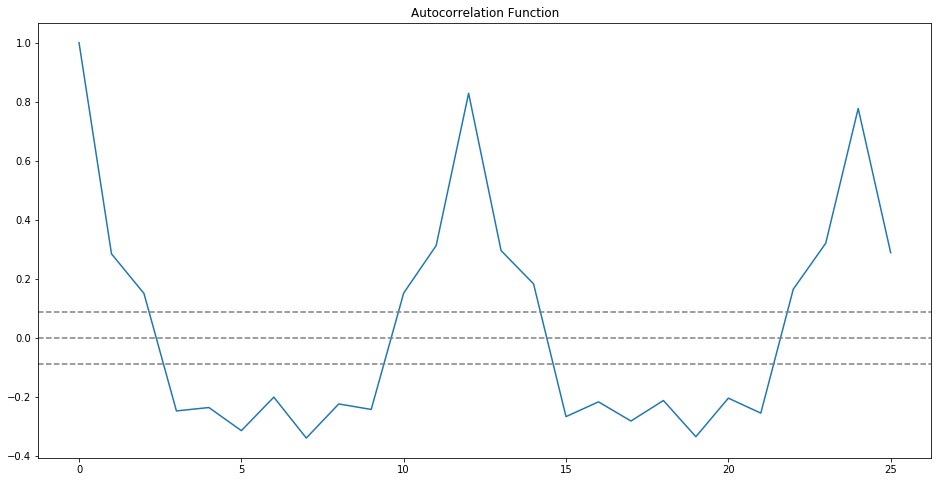

In [67]:
# ACF plot
plt.figure(figsize=(16,8))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

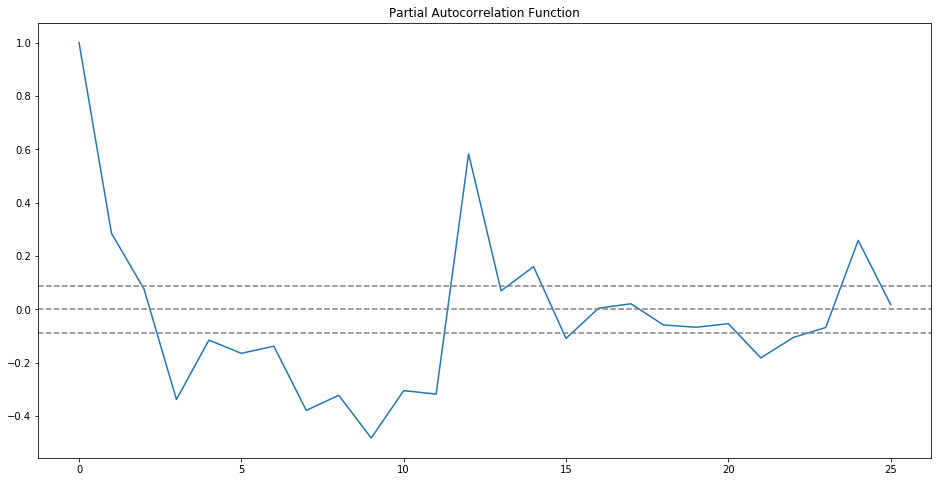

In [68]:
# PACF plot
plt.figure(figsize=(16,8))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

C:\Users\himanshu\Anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\himanshu\Anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


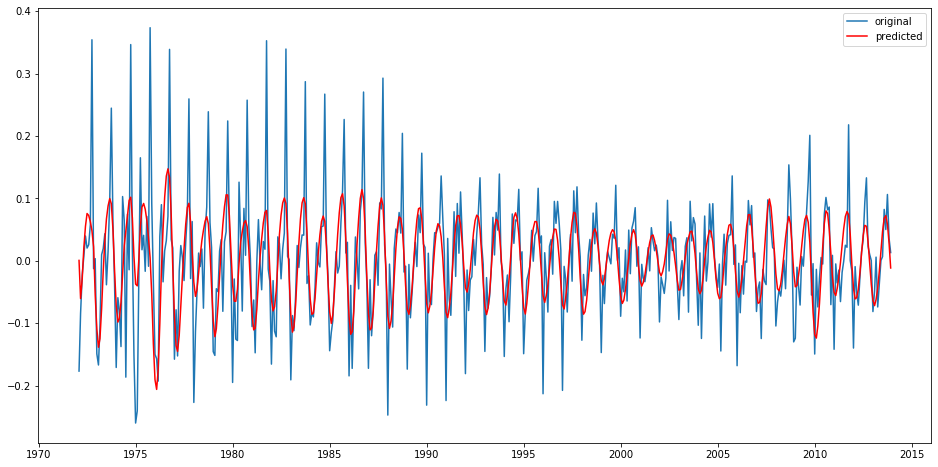

In [70]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_log, order=() # use the optimized values i.e conclusion drawn from acf and pacf plot
results_ARIMA = model.fit(disp=-1)  

plt.figure(figsize=(16,8))
plt.plot(train_log_diff.dropna(),  label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted')
plt.legend(loc='best')
plt.show()

# Predict for paticular time period and plot the forecasted vs actual plot
First step would be to store the predicted results as a separate series and observe it.
<br>Forecating period: **start="2014-01-01", end="2017-08-01"**

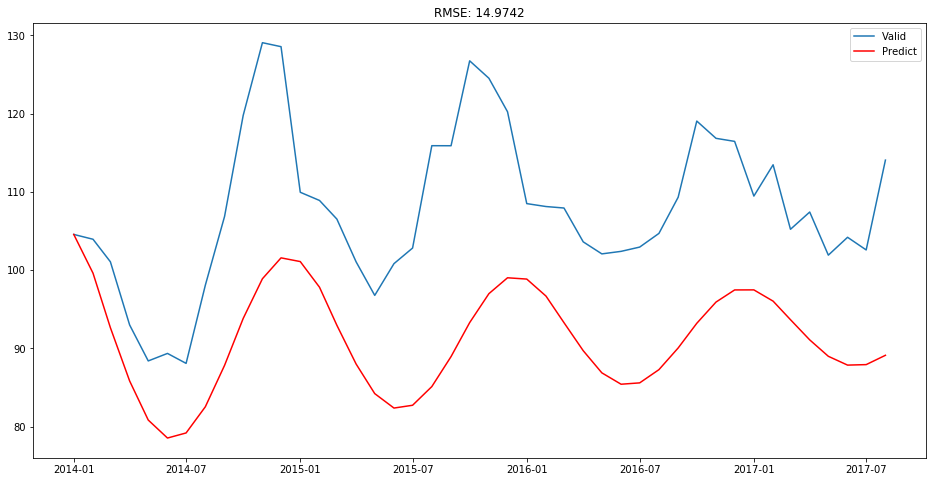

In [78]:
# First step would be to store the predicted results as a separate series and observe it.

AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series() # wirte the code for plot 
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

# SARIMAX
SARIMAX model takes into account the seasonality of the time series. So we will build a SARIMAX model on the time series.

# Q 5 Write the code for SRIMAX and Write the observation and find the optimal values for the paramters 


In [79]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Auto Arima can also be used for the same 

In [80]:
y_hat_avg = valid.copy()

# Q6 Compare and plot the all the timeseries model (RMSE)

In [82]:
# Write your code here